In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import fbeta_score, accuracy_score, recall_score, precision_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
import json
from wordcloud import WordCloud, STOPWORDS
#import mpld3
#mpld3.enable_notebook()
pd.options.display.float_format = '{:,.0f}'.format

In [ ]:
# dfreco = pd.read_csv("recommendations.csv")
# dfreco.to_parquet("recommendations.parquet")

In [ ]:
dfreco = pd.read_parquet("recommendations.parquet")

In [ ]:
dfreco.info()

In [ ]:
dfreco.describe()

In [ ]:
dfgame = pd.read_csv("games.csv")

In [ ]:
dfgame.info()

In [ ]:
dfgame.describe()

In [3]:
dfuser = pd.read_csv("users.csv")

<Axes: >

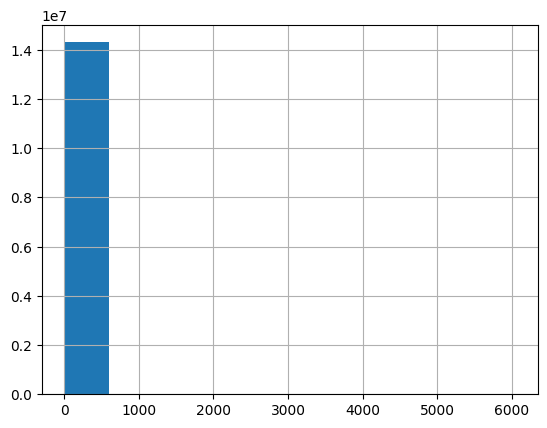

In [4]:
dfuser['reviews'].hist()

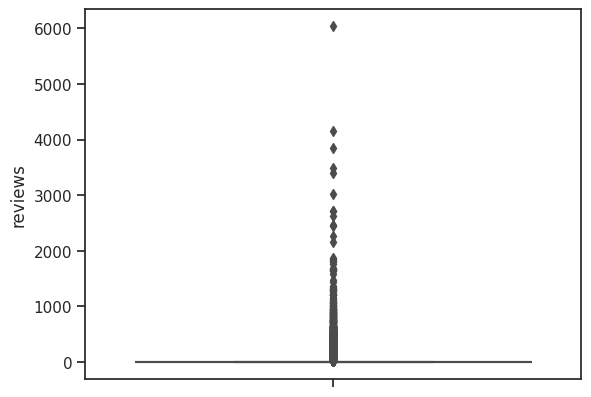

In [5]:
sns.set_theme(style="ticks")
#tips = sns.load_dataset("tips")
#ax = sns.violinplot(x=dfuser[dfuser.reviews >= 1000]['reviews'])

ax = sns.boxplot(y=dfuser["reviews"])

#ax.set(ylim=(2000,dfuser.reviews.max()))
#plt.yscale("log")
plt.show()

In [ ]:
#X = dfuser[['products', 'reviews']]

In [ ]:
X = dfuser[['reviews']]

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
model = IsolationForest(random_state=42)

In [ ]:
model.fit(X)

In [ ]:
dfuser['scores']=model.decision_function(X)
dfuser['anomaly']=model.predict(X)

In [ ]:
dfuser[dfuser.scores > 0].head(20)

In [ ]:
dfuser.info()

In [ ]:
dfuser.describe()

In [ ]:
dfmeta = pd.read_json('games_metadata.json', lines=False)

In [ ]:
dfmeta.info()

In [ ]:
dfmeta.describe()

In [ ]:
dfmeta.head()

In [ ]:
genres = {x for l in dfmeta.tags for x in l}

In [ ]:
len(genres)

In [ ]:
dfagg = dfreco[['user_id', ' 'is_recommended']].groupby(['user_id']).sum().sort_values('is_recommended', ascending=False)  

In [ ]:
dfagg

In [ ]:
dfuser.sort_values('reviews', ascending=False)

In [ ]:
df = pd.read_csv('secondary_data.csv', sep=';')
df.columns = df.columns.str.replace("-", "_")

In [ ]:
def binarize_p_or_e(cls):
    if cls =='p': 
        return True 
    else: 
        return False

In [ ]:
df['class'] = df['class'].apply(lambda x: binarize_p_or_e(x))
X = pd.get_dummies(df.drop('class', axis=1))
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [ ]:

def get_best_tree(X, y, max_depth=3, random_state=42):
    model = DecisionTreeClassifier(class_weight='balanced', random_state=random_state)
    f2s = {}     
    for i in range(3, max_depth+1):
        model = DecisionTreeClassifier(class_weight='balanced', max_depth=i, splitter='random', random_state=random_state)
        model.fit(X, y)
        y_pred = model.predict(X_test)
        f2s[f"{i}"] = float(recall_score(y_test, y_pred, zero_division=0))

    md = int(max(f2s, key=f2s.get))
    
    print("Best Recall: " + "%f" % f2s[str(md)])
    model = DecisionTreeClassifier(class_weight='balanced', max_depth=md, splitter='random', random_state=random_state) 
    model.fit(X, y)
    return model


model = get_best_tree(X_train, y_train, 100)
model.get_params()
    
    

In [ ]:
fi = pd.DataFrame(model.feature_importances_, columns=['importance'])
fi['feature'] = X.columns[fi.index]
fi.sort_values(by='importance', ascending=False)[:20]

In [ ]:
y_pred = model.predict(X_test)
pd.DataFrame(y_pred).value_counts()

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=1)}")
print(f"Recall: {recall_score(y_test, y_pred, zero_division=1)}")
print(f"F2: {fbeta_score(y_test, y_pred, beta=2, zero_division=1)}")

In [ ]:


clf = MLPClassifier(random_state=42, max_iter=300).fit(X_train, y_train)


In [ ]:
y_pred = clf.predict(X_test)
pd.DataFrame(y_pred).value_counts()

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=1)}")
print(f"Recall: {recall_score(y_test, y_pred, zero_division=1)}")
print(f"F2: {fbeta_score(y_test, y_pred, beta=2, zero_division=1)}")

In [ ]:
clf = RandomForestClassifier(random_state=42).fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
pd.DataFrame(y_pred).value_counts()

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=1)}")
print(f"Recall: {recall_score(y_test, y_pred, zero_division=1)}")
print(f"F2: {fbeta_score(y_test, y_pred, beta=2, zero_division=1)}")